# What is Independent Component Analysis?

Independent Component Analysis (ICA) is a method which can allow for data to be broken into distinct variables. Using linear algebra, a set of observables are manipulated in order determine the variables which contribute to them.

## The Rules:
1. Components which are to be determined must be independent
2. Components must be non-Gaussian

[1]
<br/><br/>
Some studies have in fact shown that ICA can still be useful in areas where Rule 1 is violated [2]

## How does it work?
We start with observations, which we will arrange as a vector $x$. Our goal is to determine the hidden variables which determine the observations, let these variables be represented by the vector $s$. By assuming that $x$ can be represented as a linear combination of variables $s$, we can say that $x=As$, where $A$ is some matrix which mixes together the variables in order to produce our observations. Generally $A$ is taken to be a square matrix, though there has been some work done where the number of signals and variables are not equal, which we will not examine here. [3] <br/> 
In the case that the first two rules are followed and the matrix $A$ is square and invertible, then we can be confident that we can recover the components of a given signal. The limitations are that the components are only determined up to a multiplying scalar factor, and their order is not determined. [2]
<br/>
The Python package sklearn includes the necessary tools to easily implement ICA on data with their FastICA algorithm, which will be used in the examples below. [4]
<br/>
The FastICA method does use a random seed, and therefore may produce several varying results from a single data set. For this reason all code below has a seed which displays a trend which is typical to produce over several runs. In following along this tutorial, I recommend you to comment out the top line which sets the random seed and run the code multiple times to see how variations occur.
# Examples


In [8]:
#Importing libraries and methods to be used later
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import FastICA


### Signal Separation [4]
One of the most common applications for ICA is signal separation. The most common example for this is known as the Cocktail Party Problem. In the case where there are two microphones in a room with two different people speaking, the microphones will record both of their voices producing mixed signals. Using ICA, the two speakers' voices could be separated from each other as different signals. <br/>
The following code (modified from the example on scikit-learn.org) demonstrates how two signals can be distinguished from each other

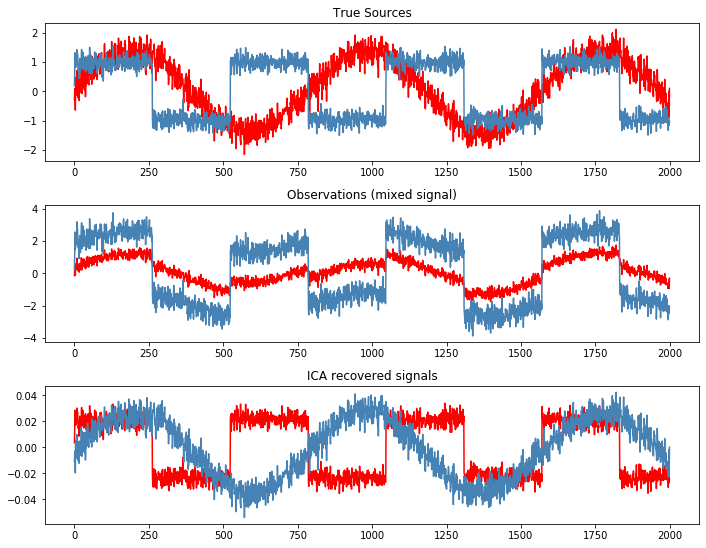

In [9]:
np.random.seed(123)

# Generate sample data
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal

S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[0.66, 0.34], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# #############################################################################
# Plot results

plt.figure(figsize=[10.0,10.0])

models = [S, X, S_]
names = [
    "True Sources",
    "Observations (mixed signal)",
    "ICA recovered signals",
]
colors = ["red", "steelblue"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

### Causal Analysis [5]
A paper written by Aapo Hyvärinen mentions that ICA can be used as a tool for causal analysis. In assuming a linear relationship between the variables, one can run ICA on both hypothesis that variable x1 causes x2 or vice versa. In order to test this principle, the following code sets up two samples which are linearly related to each other in which x2 is determined by x1. Then a crude hypothesis is made in the matrices A1 and A2 that one sample is equivalent to the other multiplied by a coeffiecient (significantly different, but with the same sign as the one actually used in the definition of x2). After standardizing the data, ICA is run on both hypothetical matrices and their results show that hypothesis one (which by design of this problem we know should be correct), appears to be much more likely than hypothesis two since it more closely matches the standardized data which we are hoping to recreate.

/apps/python/3.7-2019.10/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/apps/python/3.7-2019.10/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


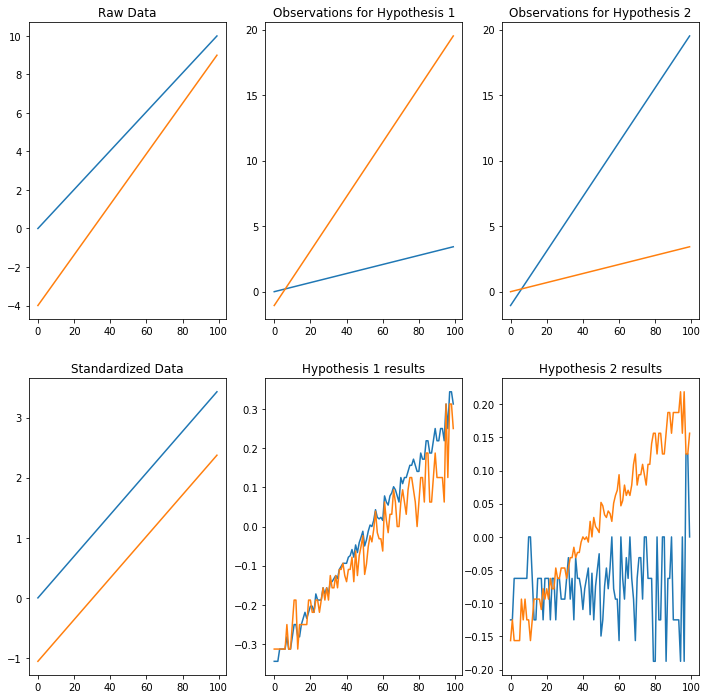

In [10]:
np.random.seed(123)
#Define the two variables, where x2 is determined by x1
x1 = np.linspace(0,10,100)
x2 = x1*1.3-4

#Create raw data
S0 = np.c_[x1, x2]

S = S0/S0.std(axis=0)  # Standardize data

#Assume for A1 that x2 follows from x1
A1 = np.array([[1.0, 0.0], [5.0, 1.0]])
#A2 assumes x1 follows from x2
A2 = np.array([[5.0, 1.0], [1.0, 0.0]])

#Create matrices for analysis
X1 = np.dot(S, A1.T)
X2 = np.dot(S, A2.T)

#Perform ICA for each matrix
ica = FastICA(n_components=2)
S1_ = ica.fit_transform(X1)
S2_ = ica.fit_transform(X2)

#Plot Results
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12,12), sharex=False, sharey=False)
axis[0,0].plot(S0)
axis[0,0].set_title("Raw Data")
axis[1,0].plot(S)
axis[1,0].set_title("Standardized Data")
axis[0,1].plot(X1)
axis[0,1].set_title("Observations for Hypothesis 1")
axis[0,2].plot(X2)
axis[0,2].set_title("Observations for Hypothesis 2")
axis[1,1].plot(S1_)
axis[1,1].set_title("Hypothesis 1 results")
axis[1,2].plot(S2_)
axis[1,2].set_title("Hypothesis 2 results")

plt.show()

# Applications
* Signal Separation
    * Cocktail Problem 
    * Removal of blinks from EEG data [1]
    * Separating Gravitational Wave signals from environmental signals [5]
    * Determine preferred latitudes for solar activity [6] 
    * Determine relations between emission, absorption, X-ray, and radio properties of quasars [7] 
* Causal Analysis
    * Identify which component causes others [2] 
* Testing ICA Accuracy
    * Running ICA with added noise to signals can help ensure ICA is producing consistent and accurate results [2] 
* Group ICA
    * Neuroimaging comparisons across multiple patients [2] 

# Sources
[1] Talebi, S. (2021, March 17). *Independent Component Analysis (ICA)*. towards data science. https://towardsdatascience.com/independent-component-analysis-ica-a3eba0ccec35
<br/><br/>
[2] Hyvärinen A. 2013. Independent component analysis: recent advances. *Phil Trans R Soc A*. 371: 20110534. http://dx.doi.org/10.1098/rsta.2011.0534
<br/><br/>
[3] (2021, November 28). *Independent Component Analysis*. Wikipedia. https://en.wikipedia.org/wiki/Independent_component_analysis
<br/><br/>
[4] (2021). *Blind source separation using FastICA*. scikit learn. <br/> &emsp; &emsp; https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py
<br/><br/>
[5] Akutsu T. et al. (2020). Application of independent component analysis to the iKAGRA data. *Progress of Theoretical and Experimental Physics*, 2020.(5), https://doi.org/10.1093/ptep/ptaa056
<br/><br/>
[6] Cadavid A.C., Lawrence J.K., and Ruzmaikin A. (2007). Principal Components and Independent Component Analysis of Solar and Space Data. *arXiv*:0709.3263 [astro-ph] http://doi.org/10.1007/s11207-007-9026-2
<br/><br/>
[7] Richards G., Rivera A., Hewett P., and Rankine A. (2020). The Power of Independent Component Analysis for Quasar Science. *American Astronomical Society Meeting Abstracts*. 235.(129.06), <br/> &emsp; &emsp; https://ui.adsabs.harvard.edu/abs/2020AAS...23512906R 